In [7]:
import lucem_illud as lucem_illud_2020 #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [29]:
from utils.utils import *
from topic_modeling.PrepareText import PrepareText


In [34]:

import lucem_illud 
from utils.utils import *
from topic_modeling.TopicModeling import TopicModels as LDA_barrosoluquer
from topic_modeling.PrepareText import PrepareText
%load_ext autoreload
%autoreload 2

import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import gensim
import numpy as np 
import pandas as pandas
import matplotlib.pyplot as plt 
import matplotlib.cm 
import seaborn as sns

%matplotlib inline

import itertools
import re
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
filepath = '../data/full_exec_orders_text.csv'

In [12]:
pd.read_csv(filepath)

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [13]:
exec_orders = pd.read_csv(filepath)

In [14]:
exec_orders

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [15]:
targetDF = exec_orders
textColumn = 'order_text'
numCategories = 5
numClusters = 5

In [16]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.4, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 board
 disputes
 dispute
 railroad
 report
 investigate
 records
 labor
 represented
 emergency


Cluster 1:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 prohibitions


Cluster 2:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37


Cluster 3:
 council
 task
 force
 health
 service
 defense
 programs
 homeland
 assistant
 subsection


Cluster 4:
 register
 presidential
 commission
 documents
 committee
 page
 advisory
 volume
 1996
 1998




In [17]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.111
Completeness: 0.164
V-measure: 0.133
Adjusted Rand Score: 0.067


In [18]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.3, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 register
 documents
 page
 volume
 1997
 1996
 1998
 1995
 tuesday
 97


Cluster 1:
 task
 force
 assistant
 succession
 administrator
 deputy
 listed
 veterans
 acting
 duties


Cluster 2:
 committee
 commission
 board
 advisory
 homeland
 programs
 trade
 labor
 december
 intelligence


Cluster 3:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 iran


Cluster 4:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37




In [19]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.141
Completeness: 0.197
V-measure: 0.164
Adjusted Rand Score: 0.067


In [20]:
# perform PCA and visualize
PCA = sklearn.decomposition.PCA(n_components = 2).fit(TFVects.toarray())
reducedPCA_data = PCA.transform(TFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in KM.labels_]

In [21]:
components = PCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [22]:
colordict = {
'barack_obama': 'red',
'george_w_bush': 'orange',
'william_j_clinton': 'green',
'donald_trump': 'blue',
'joe_biden': 'purple'
    }
colors = [colordict[c] for c in exec_orders['president']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('barack_obama', 'red'), ('george_w_bush', 'orange'), ('william_j_clinton', 'green'), ('donald_trump', 'blue'), ('joe_biden', 'purple')])


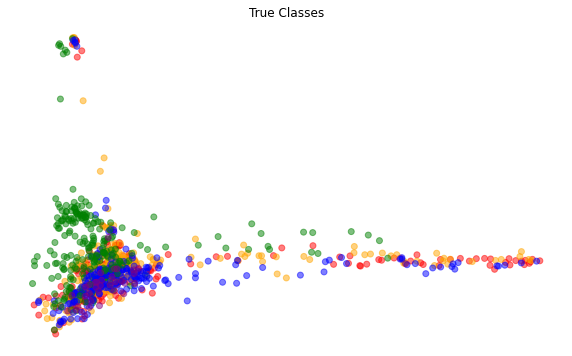

In [23]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [36]:
re.match(r'Sec. d+.', ' purposes.\n“(vii) ensure t')

In [39]:
re.search(r'\([xiv]+\)', ' purposes.\n“(vii) ensure t')

<re.Match object; span=(12, 17), match='(vii)'>

In [44]:
text = 'ollows:\n\n“Sec. 2.2. Reciprocity. Except as otherwise authorized by law or policy issued by the applicable Executive Agent, age'

In [49]:
re.search(r'Sec. \d+(.\d)?', text)

<re.Match object; span=(10, 18), match='Sec. 2.2'>

In [50]:
def clean_raw_text(text):
    text = re.sub(r'\([xiv]+\)', '', text)
    text = re.sub(r'\([A-Za-z]\)', '', text)
    text = re.sub(r'Sec. \d+(.\d)?', text)
    return text

In [42]:
re.sub(r'\([A-Za-z]\)', '', 'vetting for fitness.\n“(d) All covered individuals shall be subject to continuous vetting under standards (including, but)')

'vetting for fitness.\n“ All covered individuals shall be subject to continuous vetting under standards (including, but)'

In [ ]:
def clean_raw_text(raw_texts):
    """
    Clean text documents during pre-processing.
    :param raw_texts: list of raw texts to pre process.
    """

    common_stopwords = [
    ]
    stopwords = [x.lower() for x in common_stopwords]
    
    clean_texts = []
    for text in raw_texts:
        try:
            clean_text = text.replace(" \'m", 
                                    "'m").replace(" \'ll", 
                                    "'ll").replace(" \'re", 
                                    "'re").replace(" \'s",
                                    "'s").replace(" \'re", 
                                    "'re").replace(" n\'t", 
                                    "n't").replace(" \'ve", 
                                    "'ve").replace(" /'d", 
                                    "'d").replace('\n','')
            
            clean_text = clean_text.rstrip(" ").rstrip(" ' ").replace("\xa0", "")
            querywords = clean_text.split()
            resultwords  = [word for word in querywords if word.lower() not in stopwords]
            final_text = ' '.join(resultwords)

            clean_texts.append(final_text)
        except AttributeError:
            print("ERROR CLEANING")
            # print(text)
            continue
    return clean_texts

In [31]:

#Apply our functions
exec_orders['tokenized_text'] = exec_orders['order_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
exec_orders['normalized_tokens'] = exec_orders['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [32]:
exec_orders.order_text.values

array(["\n\nTitle 3—\nThe President\n\nExecutive Order 13764 of January 17, 2017\nAmending the Civil Service Rules, Executive Order 13488, and Executive Order 13467 To Modernize the Executive Branch-Wide Governance Structure and Processes for Security Clearances, Suitability and Fitness for Employment, and Credentialing, and Related Matters\nBy the authority vested in me as President by the Constitution and the laws of the United States of America, and as part of continuing efforts to modernize the overarching executive branch enterprise to ensure that all persons performing work for or on behalf of the Government are and continue to be loyal to the United States, reliable, trustworthy, and of good conduct and character, and by using mutually consistent standards and procedures, it is hereby ordered as follows:\n\nSection 1. Amendments to the Civil Service Rules. (a) Civil Service Rule II is amended as follows:\n(i) The title to 5 CFR Part 2 is revised to read as follows:\n“PART 2—APPO